<a href="https://colab.research.google.com/github/WuraolaOyewusi/Simple-Natural-Language-Processing-Projects-for-Health-Sciences/blob/master/fastText_for_Standard_treatment_guideline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Text Download and Extraction from pdf

In [6]:
!wget "https://github.com/WuraolaOyewusi/Simple-Natural-Language-Processing-Projects-for-Health-Sciences/raw/master/Standard%20Treatment%20Guideline(Nigeria%2C2008)%20without%20index%20and%20appendices.pdf"

--2019-12-26 14:53:07--  https://github.com/WuraolaOyewusi/Simple-Natural-Language-Processing-Projects-for-Health-Sciences/raw/master/Standard%20Treatment%20Guideline(Nigeria%2C2008)%20without%20index%20and%20appendices.pdf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WuraolaOyewusi/Simple-Natural-Language-Processing-Projects-for-Health-Sciences/master/Standard%20Treatment%20Guideline(Nigeria%2C2008)%20without%20index%20and%20appendices.pdf [following]
--2019-12-26 14:53:07--  https://raw.githubusercontent.com/WuraolaOyewusi/Simple-Natural-Language-Processing-Projects-for-Health-Sciences/master/Standard%20Treatment%20Guideline(Nigeria%2C2008)%20without%20index%20and%20appendices.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to ra

In [0]:
%%capture
!pip install tika        #Tika is a Python Library to extract Text from Pdf
!pip install fasttext

In [0]:
%%capture
import nltk
from pprint import pprint
from gensim.models import FastText
import fasttext
nltk.download('punkt')
from nltk import word_tokenize
from pprint import pprint
from tika import parser
import string
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [0]:
rawText = parser.from_file('Standard Treatment Guideline(Nigeria,2008) without index and appendices.pdf')

In [10]:
print(type(rawText))    #Tika parser returns a dictionary
print(rawText.items())  #Returned dictionary contains metadata and content

<class 'dict'>
dict_items([('metadata', {'Content-Type': 'application/pdf', 'Last-Modified': '2019-12-06T10:06:35Z', 'Last-Save-Date': '2019-12-06T10:06:35Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '2920', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'date': '2019-12-06T10:06:35Z', 'dc:format': 'application/pdf; version=1.6', 'dcterms:modified': '2019-12-06T10:06:35Z', 'meta:save-date': '2019-12-06T10:06:35Z', 'modified': '2019-12-06T10:06:35Z', 'pdf:PDFVersion': '1.6', 'pdf:charsPerPage': ['5718', '6059', '52

In [11]:
rawList = rawText['content'].splitlines()                        
rawList = [item.lower() for item in rawList if item.strip()]    
print(len(rawList))   #About 23229 sentences in total
print(rawList[23222])   #sample sentence

23229
listed for medicines used for the treatment of the stated


In [12]:
stg_str = ' '.join(rawList)     #Join list of sentences into string
for c in string.punctuation:
    stg_str = stg_str.replace(c, "")  #remove punctuations
len(stg_str)                                      #About 693967 strings in total   

676670

In [0]:
with open("stg2008.txt", "w") as text_file:
    text_file.write(stg_str)                                       #write string as text file

##Train unsupervised fastText models  at  10,20,30 epochs

In [49]:
%%time
stgmodel_10 = fasttext.train_unsupervised('stg2008.txt',epoch=10,dim=300)    #train model using fasttext
stgmodel_10.save_model('stg2008_10.bin')    #save trained model

CPU times: user 55.8 s, sys: 1.44 s, total: 57.2 s
Wall time: 1min 23s


In [50]:
%%time
stgmodel_20 = fasttext.train_unsupervised('stg2008.txt',epoch=20,dim=300)    #train model using fasttext
stgmodel_20.save_model('stg2008_20.bin')    #save trained model

CPU times: user 1min 42s, sys: 1.79 s, total: 1min 44s
Wall time: 2min 11s


In [51]:
%%time
stgmodel_30 = fasttext.train_unsupervised('stg2008.txt',epoch=30,dim=300)    #train model using fasttext
stgmodel_30.save_model('stg2008_30.bin')    #save trained model

CPU times: user 2min 32s, sys: 2.5 s, total: 2min 35s
Wall time: 3min 2s


In [0]:
fasttext_trained_model_10 = FastText.load_fasttext_format('stg2008_10.bin') #Load Model using gensim's Fasttext 
fasttext_trained_model_20 = FastText.load_fasttext_format('stg2008_20.bin') #Load Model using gensim's Fasttext 
fasttext_trained_model_30 = FastText.load_fasttext_format('stg2008_30.bin') #Load Model using gensim's Fasttext 

In [22]:
fasttext_trained_model.wv.vocab

{'of': <gensim.models.keyedvectors.Vocab at 0x7ff780659710>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7ff780659748>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7ff780659240>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7ff7806594e0>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7ff780659be0>,
 'or': <gensim.models.keyedvectors.Vocab at 0x7ff7806595c0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7ff780659208>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7ff780659908>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7ff780659048>,
 'mg': <gensim.models.keyedvectors.Vocab at 0x7ff780659080>,
 'treatment': <gensim.models.keyedvectors.Vocab at 0x7ff780659940>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7ff7804b74a8>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7ff7804b7550>,
 'may': <gensim.models.keyedvectors.Vocab at 0x7ff7804b7588>,
 'daily': <gensim.models.keyedvectors.Vocab at 0x7ff7804b75c0>,
 'hours': <gensim.models.keyedvectors.Vocab at 0x7ff7804b7710>,
 'as':

In [58]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["dizziness"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["dizziness"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["dizziness"], topn=5)))


For 10 epochs model[('drowsiness', 0.9582035541534424), ('headache', 0.936184287071228), ('dryness', 0.920276403427124), ('headaches', 0.9076910018920898), ('nausea', 0.8979116678237915)]

For 20 epochs model[('drowsiness', 0.8123891353607178), ('shortness', 0.7257866859436035), ('syncope', 0.7250152826309204), ('dryness', 0.6867588758468628), ('lethargy', 0.661155104637146)]

For 30 epochs model[('drowsiness', 0.6565455794334412), ('shortness', 0.64012211561203), ('dryness', 0.5671372413635254), ('syncope', 0.5500494241714478), ('weakness', 0.5497733354568481)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [59]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["paracetamol"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["paracetamol"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["paracetamol"], topn=5)))


For 10 epochs model[('analgesics', 0.9049877524375916), ('acetylsalicylic', 0.8845304250717163), ('hourly', 0.8772410154342651), ('salbutamol', 0.8770194053649902), ('500', 0.8670943975448608)]

For 20 epochs model[('analgesics', 0.640142560005188), ('g', 0.6355786323547363), ('480', 0.5870703458786011), ('acetylsalicylic', 0.5811442136764526), ('ibuprofen', 0.5797548890113831)]

For 30 epochs model[('dosing', 0.5184269547462463), ('analgesics', 0.5020008683204651), ('480', 0.47163262963294983), ('240', 0.4574931561946869), ('acetylsalicylic', 0.455782949924469)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [60]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["pain"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["pain"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["pain"], topn=5)))


For 10 epochs model[('pains', 0.896994948387146), ('painless', 0.8674392700195312), ('aura', 0.8628156185150146), ('anorexia', 0.8565078973770142), ('stiffness', 0.8534125089645386)]

For 20 epochs model[('pains', 0.7490514516830444), ('painful', 0.6681345701217651), ('painless', 0.5579604506492615), ('complaints', 0.5209423303604126), ('plain', 0.5186083912849426)]

For 30 epochs model[('pains', 0.6535670161247253), ('painful', 0.525772213935852), ('painless', 0.47068706154823303), ('main', 0.40625637769699097), ('abdominal', 0.40297332406044006)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [61]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["gastroenteritis"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["gastroenteritis"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["gastroenteritis"], topn=5)))


For 10 epochs model[('gastritis', 0.9290789365768433), ('gastrointestinal', 0.8811565637588501), ('pancreatitis', 0.8668469786643982), ('peptic', 0.8577708005905151), ('gastric', 0.8494676351547241)]

For 20 epochs model[('gastritis', 0.8694455623626709), ('gastric', 0.7542743682861328), ('gastrointestinal', 0.7388126254081726), ('peptic', 0.6459965705871582), ('dysentery', 0.621463418006897)]

For 30 epochs model[('gastritis', 0.824153482913971), ('gastrointestinal', 0.7180933952331543), ('gastric', 0.6840431094169617), ('dysentery', 0.6120988726615906), ('peptic', 0.5740396976470947)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [62]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["malaria"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["malaria"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["malaria"], topn=5)))


For 10 epochs model[('febrile', 0.855658769607544), ('crises', 0.7933704853057861), ('haemolytic', 0.7816790342330933), ('histology', 0.7796609401702881), ('haemolysis', 0.7777414321899414)]

For 20 epochs model[('febrile', 0.5875685214996338), ('proteinuria', 0.5662850737571716), ('folic', 0.5509389638900757), ('splenomegaly', 0.5478829145431519), ('ovarian', 0.5325782895088196)]

For 30 epochs model[('parasites', 0.45148569345474243), ('ovarian', 0.4451597332954407), ('folic', 0.44089698791503906), ('cerebral', 0.41459041833877563), ('oliguria', 0.4026787579059601)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [63]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["sepsis"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["sepsis"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["sepsis"], topn=5)))


For 10 epochs model[('fibrosis', 0.90422523021698), ('haemolysis', 0.8829312324523926), ('debris', 0.8793493509292603), ('sclerosis', 0.8668500185012817), ('leucocytosis', 0.8536408543586731)]

For 20 epochs model[('basis', 0.6319530606269836), ('thrombosis', 0.5971360206604004), ('preexisting', 0.5717576742172241), ('atelectasis', 0.5651276707649231), ('crisis', 0.5633425712585449)]

For 30 epochs model[('necrosis', 0.4591243863105774), ('vertigo', 0.4444141089916229), ('basis', 0.4327285885810852), ('crisis', 0.427929162979126), ('psychosis', 0.4185298979282379)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [64]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["ciprofloxacin"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["ciprofloxacin"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["ciprofloxacin"], topn=5)))


For 10 epochs model[('fluconazole', 0.9416192770004272), ('gentamicin', 0.9365870952606201), ('aciclovir', 0.9346696138381958), ('doxycycline', 0.9343892335891724), ('ibuprofen', 0.9324017763137817)]

For 20 epochs model[('azithromycin', 0.7529835104942322), ('480', 0.7024049162864685), ('every12', 0.6952436566352844), ('750', 0.6907142996788025), ('960', 0.6730709075927734)]

For 30 epochs model[('azithromycin', 0.6300053596496582), ('rifampicin', 0.5873949527740479), ('every12', 0.5591945052146912), ('480', 0.5590738654136658), ('ceftriaxone', 0.5418074727058411)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [67]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["adverse effect"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["adverse effect"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["adverse effect"], topn=5)))


For 10 epochs model[('adverse', 0.9207590222358704), ('notable', 0.9050818681716919), ('drug', 0.9025295972824097), ('adjuvant', 0.8844457864761353), ('contraindications', 0.8697888255119324)]

For 20 epochs model[('adverse', 0.8352594971656799), ('effect', 0.6851158142089844), ('effects', 0.6488581299781799), ('reactions', 0.6269594430923462), ('notable', 0.6092997789382935)]

For 30 epochs model[('adverse', 0.7905198335647583), ('effect', 0.6326106190681458), ('notable', 0.6002745628356934), ('drug', 0.5545644164085388), ('effects', 0.5515033006668091)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["ulcer"], topn=5)))
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["ulcer"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["ulcer"], topn=5)))


For 10 epochs model[('ulcers', 0.8904516696929932), ('cancer', 0.8291261792182922), ('ulcerative', 0.8008972406387329), ('oesophagus', 0.7954973578453064), ('peptic', 0.787898600101471)]

For 20 epochs model[('ulcers', 0.7880502939224243), ('ulcerative', 0.7118950486183167), ('ulceration', 0.7025587558746338), ('peptic', 0.5605218410491943), ('gastritis', 0.5325325727462769)]

For 30 epochs model[('ulcers', 0.7061822414398193), ('ulcerative', 0.6691617369651794), ('ulceration', 0.6404780745506287), ('peptic', 0.5424119234085083), ('amoebic', 0.4882155656814575)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [71]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["gonorhhoea"], topn=5)))  #incorrect spelling of word
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["gonorhhoea"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["gonorhhoea"], topn=5)))


For 10 epochs model[('gonorrhoea', 0.9814373254776001), ('gonorrhoeae', 0.9478224515914917), ('same', 0.88121497631073), ('gonococcal', 0.8597482442855835), ('candida', 0.8553809523582458)]

For 20 epochs model[('gonorrhoea', 0.9735233783721924), ('gonorrhoeae', 0.9180431365966797), ('gonococcal', 0.7047483325004578), ('chlamydia', 0.6894460916519165), ('nongonococcal', 0.6429787874221802)]

For 30 epochs model[('gonorrhoea', 0.9689017534255981), ('gonorrhoeae', 0.9023888111114502), ('gonococcal', 0.6111904978752136), ('nongonococcal', 0.5462511777877808), ('neisseria', 0.5353579521179199)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [72]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["insulin"], topn=5)))  
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["insulin"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["insulin"], topn=5)))

For 10 epochs model[('deficit', 0.844693660736084), ('intake', 0.8428065776824951), ('oglas', 0.8420634865760803), ('calories', 0.8406931757926941), ('iodine', 0.839836835861206)]

For 20 epochs model[('oglas', 0.6434071063995361), ('sulphonylureas', 0.6225800514221191), ('metformin', 0.5981875658035278), ('added', 0.5503554344177246), ('mmoll', 0.5480923652648926)]

For 30 epochs model[('sulphonylureas', 0.5322369933128357), ('oglas', 0.5095759034156799), ('added', 0.5016563534736633), ('acting', 0.4712255001068115), ('metformin', 0.4635075032711029)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [73]:
print("For 10 epochs model{}\n" .format(fasttext_trained_model_10.wv.most_similar(["diabetes"], topn=5)))  #incorrect spelling of word
print("For 20 epochs model{}\n" .format(fasttext_trained_model_20.wv.most_similar(["diabetes"], topn=5)))
print("For 30 epochs model{}\n" .format(fasttext_trained_model_30.wv.most_similar(["diabetes"], topn=5)))

For 10 epochs model[('states', 0.8773221969604492), ('diabetic', 0.8735930323600769), ('mellitus', 0.8661960363388062), ('managed', 0.8418309688568115), ('types', 0.8181455731391907)]

For 20 epochs model[('mellitus', 0.7721080183982849), ('diabetic', 0.7190732955932617), ('goals', 0.6079843640327454), ('gdm', 0.6015347242355347), ('people', 0.5803878307342529)]

For 30 epochs model[('mellitus', 0.7367488145828247), ('diabetic', 0.614261269569397), ('goals', 0.4828929603099823), ('gdm', 0.472972571849823), ('people', 0.45599836111068726)]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [76]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dizziness"])))  #incorrect spelling of word
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dizziness"])))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dizziness"])))

For 10 epochs model paracetamol

For 20 epochs model paracetamol

For 30 epochs model paracetamol



/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [77]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.doesnt_match(["Hydrochorothiazide", "Furosemide","Amlodipine"])))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.doesnt_match(["Hydrochorothiazide", "Furosemide","Amlodipine"])))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.doesnt_match(["Hydrochorothiazide", "Furosemide","Amlodipine"])))

For 10 epochs model Amlodipine

For 20 epochs model Amlodipine

For 30 epochs model Amlodipine



/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [78]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dry cough"])))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dry cough"])))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.doesnt_match(["paracetamol", "headache","diarrhoea","dry cough"])))

For 10 epochs model dry cough

For 20 epochs model dry cough

For 30 epochs model dry cough



/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [79]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.similarity(w1='drowsiness', w2='dizziness')))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.similarity(w1='drowsiness', w2='dizziness')))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.similarity(w1='drowsiness', w2='dizziness')))

For 10 epochs model 0.9582034349441528

For 20 epochs model 0.812389075756073

For 30 epochs model 0.6565455794334412



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [80]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.similarity(w1='drowsiness', w2='headache')))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.similarity(w1='drowsiness', w2='headache')))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.similarity(w1='drowsiness', w2='headache')))

For 10 epochs model 0.8723451495170593

For 20 epochs model 0.579349160194397

For 30 epochs model 0.38579708337783813



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [81]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.similarity(w1='drowsiness', w2='amlodipine')))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.similarity(w1='drowsiness', w2='amlodipine')))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.similarity(w1='drowsiness', w2='amlodipine')))

For 10 epochs model 0.5793604254722595

For 20 epochs model 0.541750431060791

For 30 epochs model 0.4310232698917389



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [83]:
print("For 10 epochs model {}\n" .format(fasttext_trained_model_10.wv.similarity(w1='amlodipine', w2='cephalexin')))  
print("For 20 epochs model {}\n" .format(fasttext_trained_model_20.wv.similarity(w1='amlodipine', w2='cephalexin')))
print("For 30 epochs model {}\n" .format(fasttext_trained_model_30.wv.similarity(w1='amlodipine', w2='cephalexin')))

For 10 epochs model 0.6379944086074829

For 20 epochs model 0.2934947907924652

For 30 epochs model 0.24699269235134125



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


##Create Visualization after dimentionality Reduction using Principal Component Analysis (PCA) . Code snippets from Usman Malik https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/ 

###Generate semantically similar words for model with 10 epochs


In [85]:
semantically_similar_words = {words: [item[0] for item in fasttext_trained_model_10.wv.most_similar([words], topn=5)]
                  for words in ['ringworm','paracetamol','Nurse' ,'pain', 'nausea', 'delivery', 'infection', 'orally','child',"diabetes"]}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

ringworm:['feels', 'worms', 'vulva', 'larvae', 'trunk']
paracetamol:['analgesics', 'acetylsalicylic', 'hourly', 'salbutamol', '500']
Nurse:['course', 'written', 'intercourse', 'average', 'areas']
pain:['pains', 'painless', 'aura', 'anorexia', 'stiffness']
nausea:['diarrhoea', 'vomiting', 'drowsiness', 'dizziness', 'cramps']
delivery:['recovery', 'staff', 'postpartum', 'antenatal', 'birth']
infection:['coinfection', 'reinfection', 'infections', 'section', 'infectious']
orally:['mg', '400', 'omeprazole', '960', '8']
child:['adult', 'adolescent', 'years', 'year', 'months']
diabetes:['states', 'diabetic', 'mellitus', 'managed', 'types']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [86]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['ringworm', 'feels', 'worms', 'vulva', 'larvae', 'trunk', 'paracetamol', 'analgesics', 'acetylsalicylic', 'hourly', 'salbutamol', '500', 'Nurse', 'course', 'written', 'intercourse', 'average', 'areas', 'pain', 'pains', 'painless', 'aura', 'anorexia', 'stiffness', 'nausea', 'diarrhoea', 'vomiting', 'drowsiness', 'dizziness', 'cramps', 'delivery', 'recovery', 'staff', 'postpartum', 'antenatal', 'birth', 'infection', 'coinfection', 'reinfection', 'infections', 'section', 'infectious', 'orally', 'mg', '400', 'omeprazole', '960', '8', 'child', 'adult', 'adolescent', 'years', 'year', 'months', 'diabetes', 'states', 'diabetic', 'mellitus', 'managed', 'types']
<class 'list'>
60


In [0]:
p_comps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


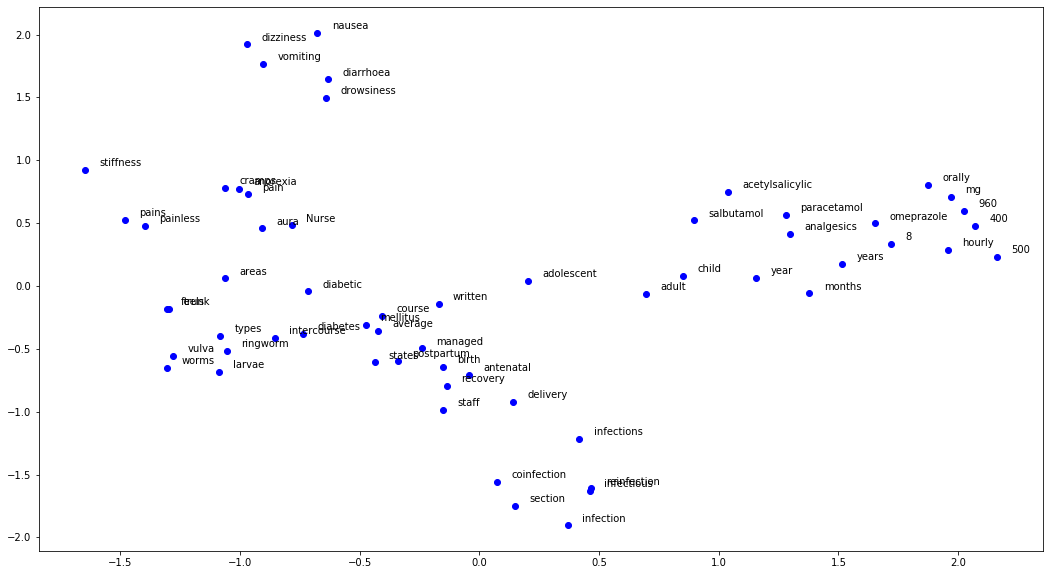

In [90]:
word_vectors = fasttext_trained_model_10[all_similar_words]

pca = PCA(2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='b')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')